In [4]:
# Alex Rios 801320278
# Assignment2 Summer 2025

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

# go ahead load and find the path for my dataset 
df = pd.read_csv('../Datasets/Housing.csv')
df.head() # To get first n rows from the dataset default value of n is 5
M=len(df)
M

print(f"Loaded {M} samples.") # rather than a random "100" I will add addtional info on what 100 means. 
print(df.head()) # from the df.head() I went ahead and added print to make it show our first 4 rows 

Loaded 545 samples.
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000



Problem 1.a: Baseline (5 features)
Learning Rate=0.1 MSE=0.4637
Learning Rate=0.05 MSE=0.4637
Learning Rate=0.01 MSE=0.4636
Best Learning Rate =0.01, MSE=0.4636


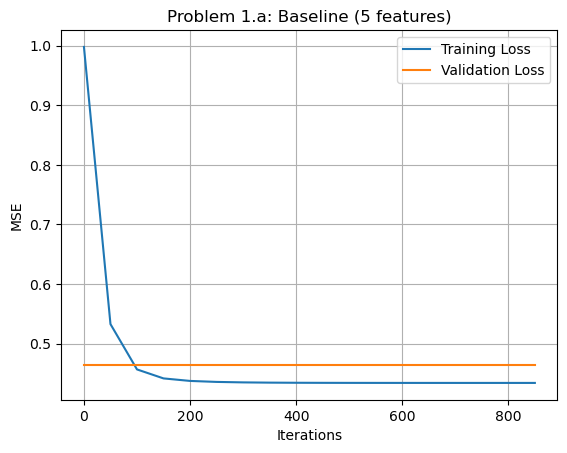


Problem 1.b: Baseline (11 features)
Learning Rate=0.1 MSE=0.3690
Learning Rate=0.05 MSE=0.3690
Learning Rate=0.01 MSE=0.3691
Best Learning Rate =0.1, MSE=0.3690


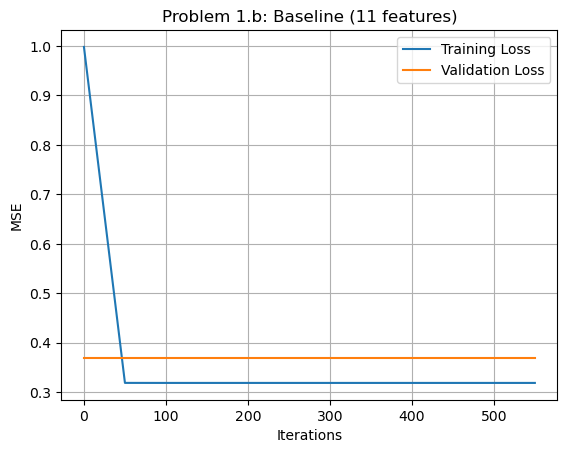


Problem 2.a: Normalization vs Standardization (5 Features)
Normalized MSE: 0.4711
Standardized MSE: 0.4637


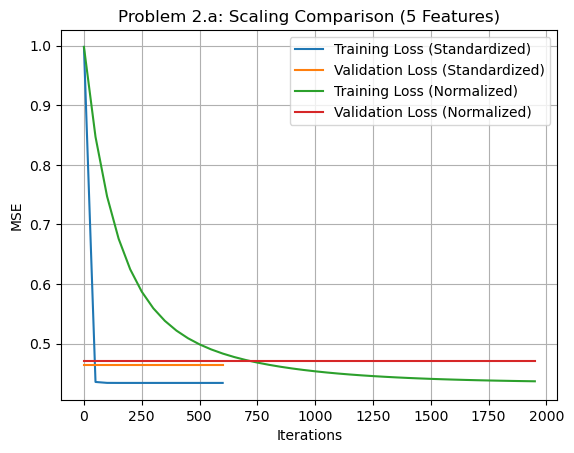


Problem 2.b: Normalization vs Standardization (11 Features)
Normalized MSE: 0.3692
Standardized MSE: 0.3690


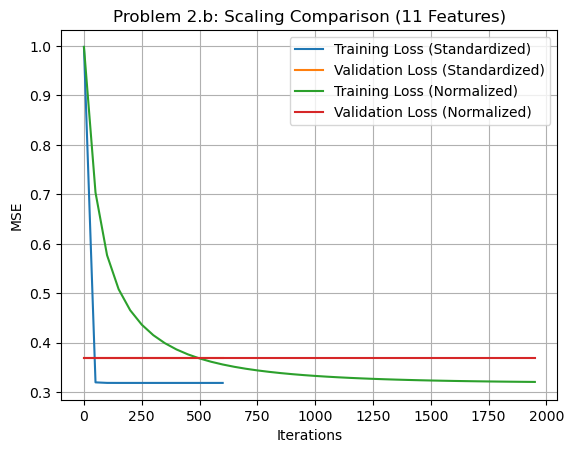


Problem 3.a: Regularization (5 Features)
Regularized MSE: 0.4637
Standardized MSE: 0.4637


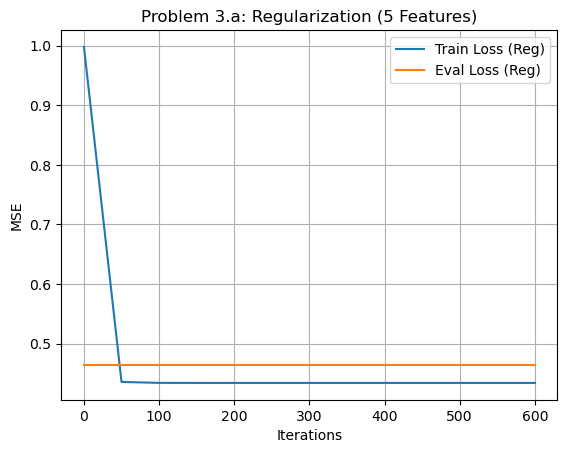


Problem 3.b: Regularization (11 Features)
Regularized MSE: 0.3689
Standardized MSE: 0.3690


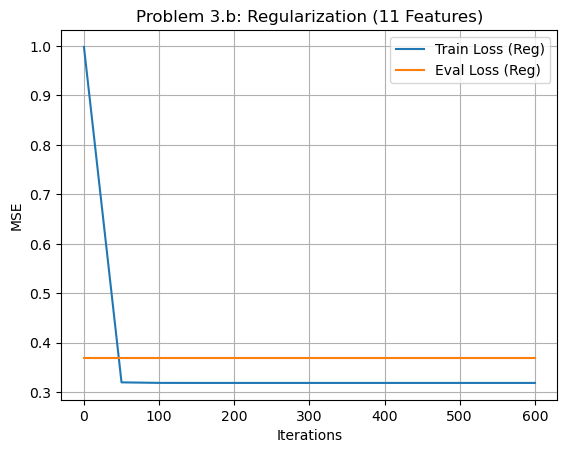

In [6]:
# we are going to convert yes and no to a binary 1 and 0
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].apply(lambda col: col.map({'yes': 1, 'no': 0}))
df.drop(columns='furnishingstatus', inplace=True)

# Prepare features and target
y = df['price'].astype(float).values
X_all = df.drop(columns='price').astype(float).values

# Scaling functions
standardize = lambda X: (X - X.mean(axis=0)) / X.std(axis=0)
normalize = lambda X: (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_std = standardize(X_all)
y_std = standardize(y.reshape(-1, 1)).flatten()

# Split function
def split(X, y, ratio=0.8, seed=42):
    np.random.seed(seed)
    idx = np.random.permutation(len(y))
    k = int(ratio * len(y))
    return X[idx[:k]], X[idx[k:]], y[idx[:k]], y[idx[k:]]

# Gradient Descent
def gd(X, y, lr=0.01, epochs=2000, lam=0):
    m, n = X.shape
    t, b = np.zeros(n), 0
    losses, best, wait = [], float('inf'), 0
    for i in range(epochs):
        err = (X @ t + b) - y
        t -= lr * ((X.T @ err) / m + (lam / m) * t)
        b -= lr * err.mean()
        if i % 50 == 0:
            mse = (err ** 2).mean()
            losses.append(mse)
            if mse < best - 1e-3:
                best, wait = mse, 0
            else:
                wait += 1
            if wait >= 10: break
    return t, b, losses

# MSE function
def mse(X, y, t, b):
    return ((X @ t + b - y) ** 2).mean()

# Run and plot function
def run_case(title, X, y, rates=[0.1, 0.05, 0.01], reg=0):
    print(f"\n{title}")
    Xt, Xe, yt, ye = split(X, y)
    best_mse, best_lr, best_loss = float('inf'), None, []
    for lr in rates:
        t, b, losses = gd(Xt, yt, lr, lam=reg)
        val = mse(Xe, ye, t, b)
        print(f"Learning Rate={lr} MSE={val:.4f}")
        if val < best_mse:
            best_mse, best_lr, best_loss = val, lr, losses
    print(f"Best Learning Rate ={best_lr}, MSE={best_mse:.4f}")
    steps = range(0, len(best_loss) * 50, 50)
    plt.plot(steps, best_loss, label='Training Loss')
    plt.plot(steps, [best_mse] * len(steps), label='Validation Loss')
    plt.title(title)
    plt.xlabel('Iterations')
    plt.ylabel('MSE')
    plt.grid(True)
    plt.legend()
    plt.show()

# Problem 1
run_case("Problem 1.a: Baseline (5 features)", X_std[:, [0,1,2,3,9]], y_std)
run_case("Problem 1.b: Baseline (11 features)", X_std, y_std)

# Problem 2a: 4-line plot for standardization vs normalization (5 features)
print("\nProblem 2.a: Normalization vs Standardization (5 Features)")
X5_std = X_std[:, [0,1,2,3,9]]
X5_norm = normalize(X_all[:, [0,1,2,3,9]])
Xt_s, Xe_s, yt_s, ye_s = split(X5_std, y_std)
Xt_n, Xe_n, yt_n, ye_n = split(X5_norm, y_std)
t_s, b_s, l_s = gd(Xt_s, yt_s, lr=0.05)
t_n, b_n, l_n = gd(Xt_n, yt_n, lr=0.05)
mse_s, mse_n = mse(Xe_s, ye_s, t_s, b_s), mse(Xe_n, ye_n, t_n, b_n)

print(f"Normalized MSE: {mse_n:.4f}")
print(f"Standardized MSE: {mse_s:.4f}")

X5_std = X_std[:, [0,1,2,3,9]]
X5_norm = normalize(X_all[:, [0,1,2,3,9]])
Xt_s, Xe_s, yt_s, ye_s = split(X5_std, y_std)
Xt_n, Xe_n, yt_n, ye_n = split(X5_norm, y_std)
t_s, b_s, l_s = gd(Xt_s, yt_s, lr=0.05)
t_n, b_n, l_n = gd(Xt_n, yt_n, lr=0.05)
mse_s, mse_n = mse(Xe_s, ye_s, t_s, b_s), mse(Xe_n, ye_n, t_n, b_n)
steps_s = range(0, len(l_s) * 50, 50)
steps_n = range(0, len(l_n) * 50, 50)
plt.plot(steps_s, l_s, label='Training Loss (Standardized)')
plt.plot(steps_s, [mse_s]*len(steps_s), label='Validation Loss (Standardized)')
plt.plot(steps_n, l_n, label='Training Loss (Normalized)')
plt.plot(steps_n, [mse_n]*len(steps_n), label='Validation Loss (Normalized)')
plt.title("Problem 2.a: Scaling Comparison (5 Features)")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.grid(True)
plt.legend()
plt.show()

# Problem 2b: 4-line plot for standardization vs normalization (11 features)
print("\nProblem 2.b: Normalization vs Standardization (11 Features)")
Xt_s, Xe_s, yt_s, ye_s = split(X_std, y_std)
X_norm = normalize(X_all)
Xt_n, Xe_n, yt_n, ye_n = split(X_norm, y_std)
t_s, b_s, l_s = gd(Xt_s, yt_s, lr=0.05)
t_n, b_n, l_n = gd(Xt_n, yt_n, lr=0.05)
mse_s, mse_n = mse(Xe_s, ye_s, t_s, b_s), mse(Xe_n, ye_n, t_n, b_n)

print(f"Normalized MSE: {mse_n:.4f}")
print(f"Standardized MSE: {mse_s:.4f}")

Xt_s, Xe_s, yt_s, ye_s = split(X_std, y_std)
X_norm = normalize(X_all)
Xt_n, Xe_n, yt_n, ye_n = split(X_norm, y_std)
t_s, b_s, l_s = gd(Xt_s, yt_s, lr=0.05)
t_n, b_n, l_n = gd(Xt_n, yt_n, lr=0.05)
mse_s, mse_n = mse(Xe_s, ye_s, t_s, b_s), mse(Xe_n, ye_n, t_n, b_n)
steps_s = range(0, len(l_s) * 50, 50)
steps_n = range(0, len(l_n) * 50, 50)
plt.plot(steps_s, l_s, label='Training Loss (Standardized)')
plt.plot(steps_s, [mse_s]*len(steps_s), label='Validation Loss (Standardized)')
plt.plot(steps_n, l_n, label='Training Loss (Normalized)')
plt.plot(steps_n, [mse_n]*len(steps_n), label='Validation Loss (Normalized)')
plt.title("Problem 2.b: Scaling Comparison (11 Features)")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.grid(True)
plt.legend()
plt.show()

# Problem 3
print("\nProblem 3.a: Regularization (5 Features)")
Xt, Xe, yt, ye = split(X_std[:, [0,1,2,3,9]], y_std)
t_reg, b_reg, l_reg = gd(Xt, yt, lr=0.05, lam=1.0)
mse_reg = mse(Xe, ye, t_reg, b_reg)
mse_std = mse(Xe, ye, *gd(Xt, yt, lr=0.05)[:2])  # baseline without reg

print(f"Regularized MSE: {mse_reg:.4f}")
print(f"Standardized MSE: {mse_std:.4f}")

steps = range(0, len(l_reg) * 50, 50)
plt.plot(steps, l_reg, label='Train Loss (Reg)')
plt.plot(steps, [mse_reg] * len(steps), label='Eval Loss (Reg)')
plt.title("Problem 3.a: Regularization (5 Features)")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.grid(True)
plt.legend()
plt.show()

print("\nProblem 3.b: Regularization (11 Features)")
Xt, Xe, yt, ye = split(X_std, y_std)
t_reg, b_reg, l_reg = gd(Xt, yt, lr=0.05, lam=1.0)
mse_reg = mse(Xe, ye, t_reg, b_reg)
mse_std = mse(Xe, ye, *gd(Xt, yt, lr=0.05)[:2])  # baseline without reg

print(f"Regularized MSE: {mse_reg:.4f}")
print(f"Standardized MSE: {mse_std:.4f}")

steps = range(0, len(l_reg) * 50, 50)
plt.plot(steps, l_reg, label='Train Loss (Reg)')
plt.plot(steps, [mse_reg] * len(steps), label='Eval Loss (Reg)')
plt.title("Problem 3.b: Regularization (11 Features)")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.grid(True)
plt.legend()
plt.show()